<a href="https://colab.research.google.com/github/Ar8k/Assigment-2.2-CSS-Text-Styling/blob/main/FInal_project%2CEnd_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2 

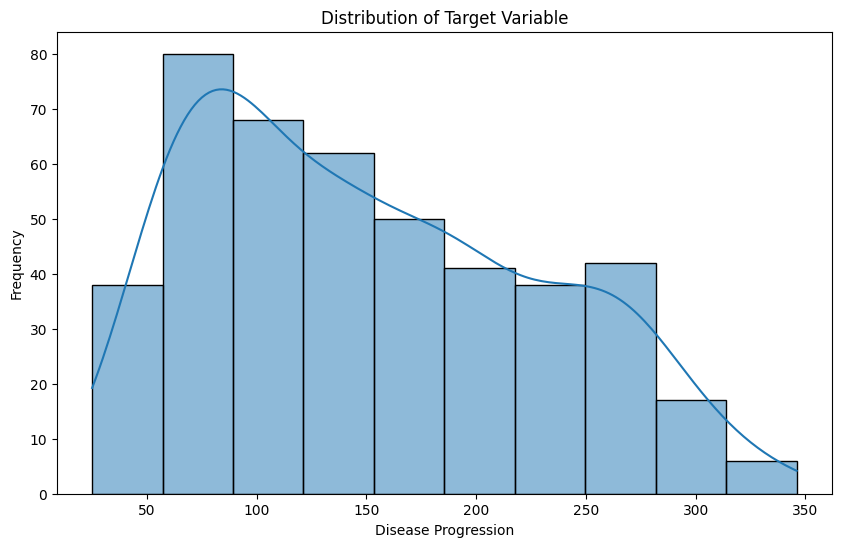


Missing values in the data:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Missing values after simulation:
age       0
sex       0
bmi       6
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

After filling missing values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Model Performance:
Mean Squared Error: 2976.84
R2 Score: 0.44


/tmp/ipython-input-807254953.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


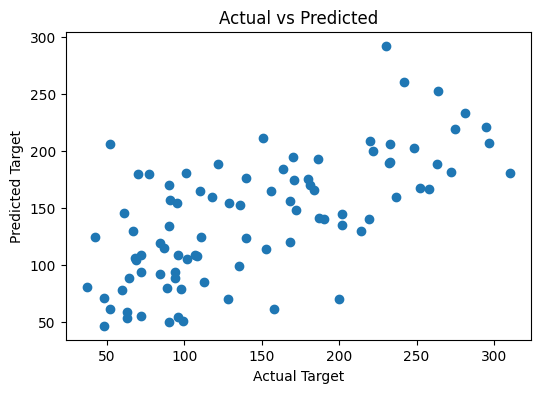

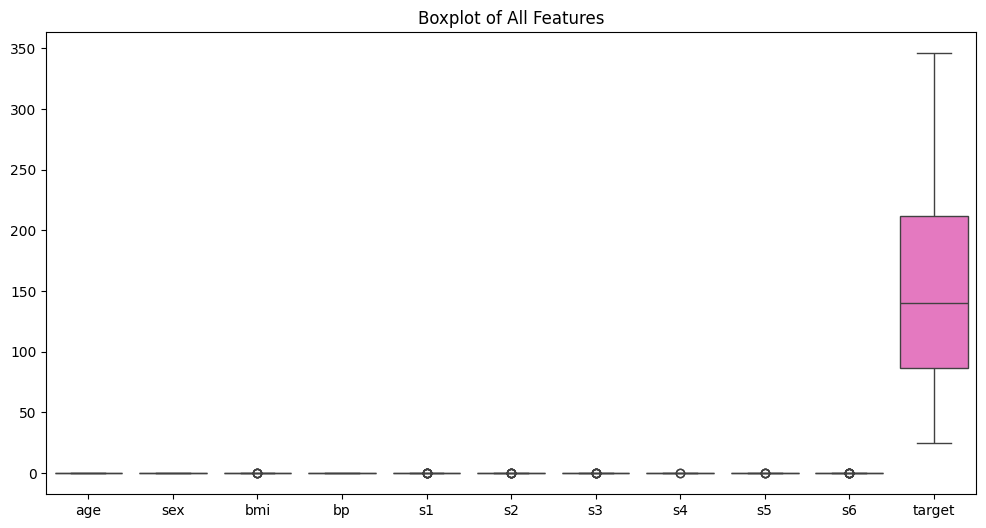

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#loading the dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target


#printing the stats I need to print
print("First 5 rows of the data:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary stats:")
print(df.describe())

#plotting
plt.figure(figsize=(10,6))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

#finding and replacing the missing values
print("\nMissing values in the data:")
print(df.isnull().sum())
df.loc[5:10, 'bmi'] = np.nan
print("\nMissing values after simulation:")
print(df.isnull().sum())
df['bmi'].fillna(df['bmi'].median(), inplace=True)
print("\nAfter filling missing values:")
print(df.isnull().sum())


#setting up and running the maching learning, and preds and whatnot
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:\nMean Squared Error: {mse:.2f}\nR2 Score: {r2:.2f}")

#setting up the graphs and visuals
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted')
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title('Boxplot of All Features')
plt.show()


